# Lab 1: Data Exploration with Python 📊

## Objectives
1. Introduction to Data, Data Science, and the Data Analysis Workflow
2. Getting to know and Practicing Python, iPython notebooks, Syntax, Data Structures

## Outline

1. [What is Data Science?](#1.-What-is-Data-Science?)
2. [The Data Science Workflow](#2.-The-Data-Science-Workflow)
3. [Studying Pretty Flowers](#3.-Studying-Pretty-Flowers)
    1. [Establishing the Problem](#Establishing-the-Problem)
    2. [Acquiring and Processing Data](#Acquiring-and-Processing-Data)
    3. [Exploring the Data](#Exploring-the-Data)
    4. [Drawing Conclusions using Machine Learning](#Drawing-Conclusions-using-Machine-Learning)
    5. [Communicating Your Findings](#Communicating-Your-Findings)

## 1. What is Data Science?

Data science is an interdisciplinary field that combines technical skills and domain specific knowledge to supercharge your data analysis. A good data scientist is able to bring their mathematical expertise, mastery of programming, and problem-space knowledge together to draw better, more insightful findings than would be possible otherwise. The "Python Data Science Handbook" describes data science this way:

> [It] comprises three distinct and overlapping areas: the skills of a statistician who knows how to model and summarize datasets (which are growing ever larger); the skills of a computer scientist who can design and use algorithms to efficiently store, process, and visualize this data; and the domain expertise—what we might think of as “classical” training in a subject—necessary both to formulate the right questions and to put their answers in context.

The following diagram by [Drew Conway](http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram) also gives a good summary of this:

![DSvenn](utility/pics/Data_Science_VD.png)

It is important to realize that data science is more than merely building models. An effective data scientist must know how to draw meaning from their findings, understanding their results in the context of the problem.

## 2. The Data Science Workflow

As mentioned above, data science brings computational techniques to structured data analysis. While there is no _best_ way to structure your workflow, successful workflows all share the same traits. In lecture we saw the following pattern:

<img src="utility/pics/workflow.png" alt="datascience workflow" width="80%" />

This lab condenses these elements into the following sections. However, note that these are essentially the same as those listed above.

1. Establishing the problem and developing a question.
2. Acquiring and wrangling your data.
3. Exploring and understanding your data.
4. Building and testing a hypothesis and drawing conclusions.
5. Communicating your findings.

The goal of this workflow is not only to guide your analyses, but also to facilitate the intelligability of your work for your audience — after all, you are trying to find patterns that will ultimately help others.

## 3. Studying Pretty Flowers

Here we try to demonstrate an application of the data science workflow. We will practice each of the steps so that we become familar with them and understand why this process works.

### Establishing the Problem

Let's say you are a 1930s biologist-statistician (bear with me) who wants to be able to distiguish between three different species of iris flowers. You want to develop a principled method to do this because if you can classify flowers, you can classify anything (supposedly). So can we find a way to identify the species of a new flower based on what we have observed about other flowers?

![iris](utility/pics/iris_small.png)

How would you go about tackling this problem? What kind of things, or **features**, about an iris flower do you think could help us tell what species it is?

### Acquiring and Processing Data

Now that you have established your question, it is time to start collecting data. Traditionally, this might have meant going out into the field with a ruler and measuring flowers yourself, but today, we often work with data that has already been collected (for example, logs about customer purchases or songs that a user listened to). You ask your colleague if they happened to have some data on irises and, luckily, they do -- what are the odds! She hands you a file containing her observations.

First, we load our file into a list datastructure. Our file comes in a CSV format. Let's take a look at what a CSV file looks like:

In [2]:
with open('utility/data/iris.csv') as myfile:
    head = [next(myfile) for _ in range(10)]
    
    for item in head:
        print(item)

sepal_length,sepal_width,petal_length,petal_width,species

5.1,3.5,1.4,0.2,setosa

4.9,3.0,1.4,0.2,setosa

4.7,3.2,1.3,0.2,setosa

4.6,3.1,1.5,0.2,setosa

5.0,3.6,1.4,0.2,setosa

5.4,3.9,1.7,0.4,setosa

4.6,3.4,1.4,0.3,setosa

5.0,3.4,1.5,0.2,setosa

4.4,2.9,1.4,0.2,setosa



CSV stands for **C**omma **S**eparated **V**alue, which can be seen in the first few lines of our file shown above. In order to process this file in python, we must load our file into a datastructure. We are going to delimit each attribute in each line by commas, and then treat each line as a separate data point when loading into our list datastructure. The code below reflects this process. 

In [3]:
def parse_csv(line):
    '''splits each line by comma'''
    return line.strip().split(',')

In [4]:
def load_data(path, parsefn):
    '''reads file at PATH and applies PARSEFN to each line'''
    with open(path) as file:
        return [parsefn(line) for line in file]

In [5]:
iris = load_data('utility/data/iris.csv', parse_csv)

**Try This!** Evaluate `iris` to see what it is in the cell below. How would you only get the first `5` lines?

In [6]:
# your code here
with open('utility/data/iris.csv') as myfile:
    head = [next(myfile) for _ in range(5)]
    
    for item in head:
        print(item)

sepal_length,sepal_width,petal_length,petal_width,species

5.1,3.5,1.4,0.2,setosa

4.9,3.0,1.4,0.2,setosa

4.7,3.2,1.3,0.2,setosa

4.6,3.1,1.5,0.2,setosa



Often, the first line in a CSV file will contain the column names for the data. Note that this is not always the case as there is no standard specification for these files. You should always open the file first to check its structure.

In our case, `iris.csv` does contain column labels. 

```
sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
```

Let's separate these headings out from the data.

In [7]:
headings, data = iris[0], iris[1:]

In [8]:
headings

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

This tells us that each observation will contain five pieces of information. The first four of these, *sepal length*, *sepal width*, *petal length*, and *petal width*, are what we typically call **features**. The last one, _species_, is what we would call a **label**, or class.

**Features** are the measurements that we have taken as part of a single observation about the subject. In this case, we have measured the *sepal length*, *sepal width*, *petal length*, and *petal width* of various iris flowers.

Let's take a look at some of the observations.

In [9]:
data[:10]

[['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'setosa']]

#### Additional Processing

We will need to do some more processing of the data before we can start exploring it.

First of all, notice how all the values in `observations` are strings. This is a result of our `load_data` not being able to tell which values should be read as numbers and which should be strings. Let's address this. The first thing we can do is to replace the string labels with enumerations.

In [10]:
species = ['setosa', 'versicolor', 'virginica']

We can call `enumerate` on this list of classes to assign numbers to the classes.

In [11]:
list(enumerate(species))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

Let's go through each observation and replace the species label with an enumeration.

In [12]:
for i, observation in enumerate(data):
    label = observation[4]
    
    for number, name in enumerate(species):
        if label == name:
            data[i][4] = number

In [13]:
data[:5]

[['5.1', '3.5', '1.4', '0.2', 0],
 ['4.9', '3.0', '1.4', '0.2', 0],
 ['4.7', '3.2', '1.3', '0.2', 0],
 ['4.6', '3.1', '1.5', '0.2', 0],
 ['5.0', '3.6', '1.4', '0.2', 0]]

With that done, we should go through each feature and make sure that they are `floats`.

In [14]:
for i, observation in enumerate(data):
    features, label = observation[:4], observation[4:]
    new_features = [float(feat) for feat in features]
    data[i] = new_features + label

In [15]:
data[:5]

[[5.1, 3.5, 1.4, 0.2, 0],
 [4.9, 3.0, 1.4, 0.2, 0],
 [4.7, 3.2, 1.3, 0.2, 0],
 [4.6, 3.1, 1.5, 0.2, 0],
 [5.0, 3.6, 1.4, 0.2, 0]]

Nice! Problem resolved.

#### Arrays

In [16]:
import numpy as np

The last thing to do before we are ready to explore is to convert our `observations` array from a `list` to a NumPy `array`. NumPy arrays are specifically designed for manipulating data and, thus, have many useful properties.

In [17]:
data = np.array(data)

**Try this!** Let's practice `array` indexing a little more. Try getting the first `8` observations. See Lab 0 for a reminder of how to do this.

In [18]:
# your code here
data[:8]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ]])

**Try this!** How about getting fancier with 2D indexing? Try to get the first *feature* from each of the last 5 observations. Check your results with your neighbor.

In [19]:
# your code here
data[-5:, 0]

array([6.7, 6.3, 6.5, 6.2, 5.9])

### Exploring the Data

Arguably more important than the data itself is what the data *looks like*. There are many insights that can be drawn from visualizations of your data. For instance, you might be able to evaluate the quality of your data (eg. are there outliers?).

In [20]:
import matplotlib.pyplot as plt
from utility.util import configure_plots

# run this cell twice to get pretty plots
configure_plots()

#### Box Plots

One of the most effective plots to look is a simple box plot. It effectively gives you a sense of the distribution of a particular feature at a glance. The figure below is a sketch of a typical box plot.

![Box plot schematic](utility/pics/box_plot_schema.png)

The orange line indicated within the box above represents the median. The median is the midpoint (distinct from the average) of the values. The median splits the data into halves such that one half is less than the median and the other is greater.

The horizontal edges of the box, parallel to the median line, denote the first and third quartiles of the data. Whereas the median divides the data into halves, a quartile splits the data into quarters. The first quartile ($Q_1$) splits off the lowest 25% of data from the highest 75%, while the third quartile ($Q_3$) off the lowest 75% of data from the highest 25%. The median is the second quartile. 

Next, the "whiskers" of the plot, which extend beyond the box, attempt to give a sense of the "spread" of the data. These whiskers are conventionally defined as the smallest (largest if upper whisker) value within $1.5 \; \times \; \text{IQR}$, where IQR is short for _interquartile range_. For example, the lower whisker is 

$$\min x \ge Q_1 - 1.5 \;\times\; \text{IQR}$$

The upper whisker is

$$\max x \le Q_3 + 1.5 \;\times\; \text{IQR}$$

In both cases, the IQR is defined as the difference between $Q_1$ and $Q_3$.

$$\text{IQR} = Q_3 - Q_1$$

It should be noted that the whiskers are somewhat arbitrary and shouldn't be taken too seriously. Their purpose is specifically to give us a **sense** of what the distribution looks like. Box plots do not claim to visualize the exact distribution.

Finally, for box plots, outliers are defined as points that lie beyond the "whiskers", again somewhat arbitrarily. This is one of many ways to define outliers. These are typically displayed as circles above and below a box plot.

Let's make box plots for each feature in our data. Here's a refresher on the features we have.

In [21]:
headings[:4]    # [4] was the species label

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

We can use the `boxplot` method on `plt` to make the plot. Go ahead and execute the next cell.

Text(0, 0.5, 'Measurements [cm]')

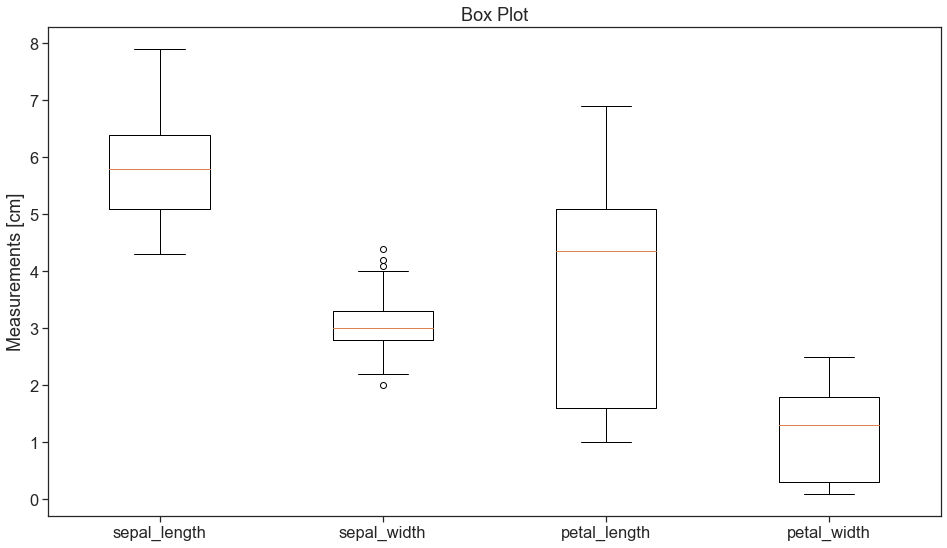

In [24]:
plt.boxplot(data[:,:4], labels=headings[:4])
plt.title('Box Plot')
plt.ylabel('Measurements [cm]')

Notice that certain features, like sepal width have smaller spreads than others, like petal length. What might this mean?

**Write-up!** Since we are in the business of classifying flowers by species, a feature that doesn't show that much variation might not be very helpful. However, there is a flaw in this conclusion. Discuss with your neighbors about what it might be and write down your answer in the cell below.

Let's try the same plot, but this time with normalized data. Normalization is the process of scaling individual samples to have unit norm.

Text(0, 0.5, 'Scaled Values')

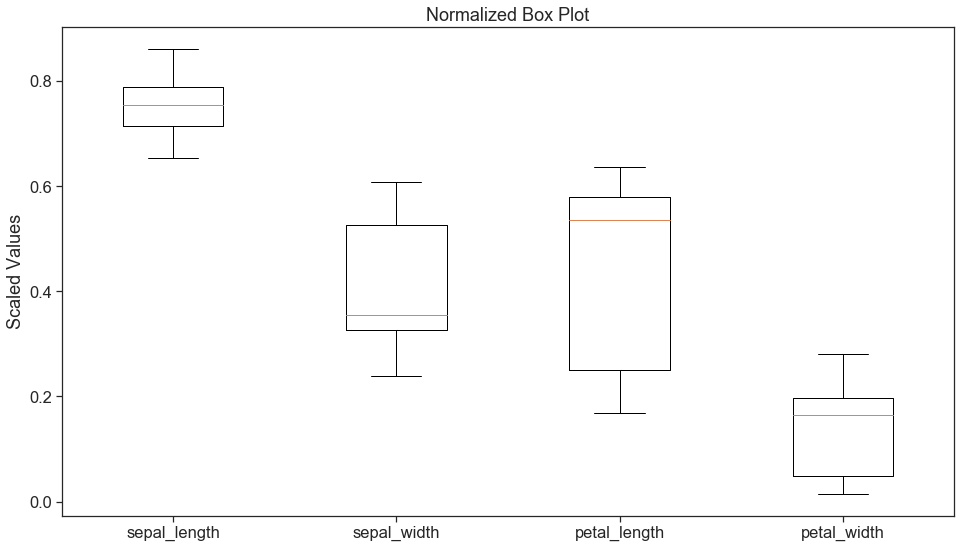

In [25]:
from sklearn.preprocessing import normalize

plt.boxplot(normalize(data[:,:4]), labels=headings[:4])
plt.title('Normalized Box Plot')
plt.ylabel('Scaled Values')

**Write-up!** Did you notice any differences? If so, what might have caused them? Discuss with your neighbors and record your discussion in the cell below (you might need it later).

#### Histograms

Another interesting plot to look at is a histogram. Histograms are essentially bar plots except that the vertical axis is always frequency. Whereas box plots are only good for giving a **sense** of the distribution of each feature, a histogram gives an **accurate** representation of a feature's distribution.

So why not always use histograms? You can only look at one feature at a time with a histogram since the plot is intrinsically 2D.

Let's try making a histogram for sepal length. The first thing we will need to do is to pull out the sepal length values from the data. Once again, here is a reminder of the feature names.

In [26]:
headings[:4]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

**Try this!** Go ahead and pull out these values and assign them to the variable `sepal_length` in the cell below.

In [27]:
# your code here
sepal_length = data[ : , 0]
sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

Let's plot! In the cell below, we are using the `hist` method on `plt` to produce a histogram with 30 bins. A histogram groups the data values into bins in order to count them.

Try changing the number of bins to see what happens.

Text(0, 0.5, 'Frequency')

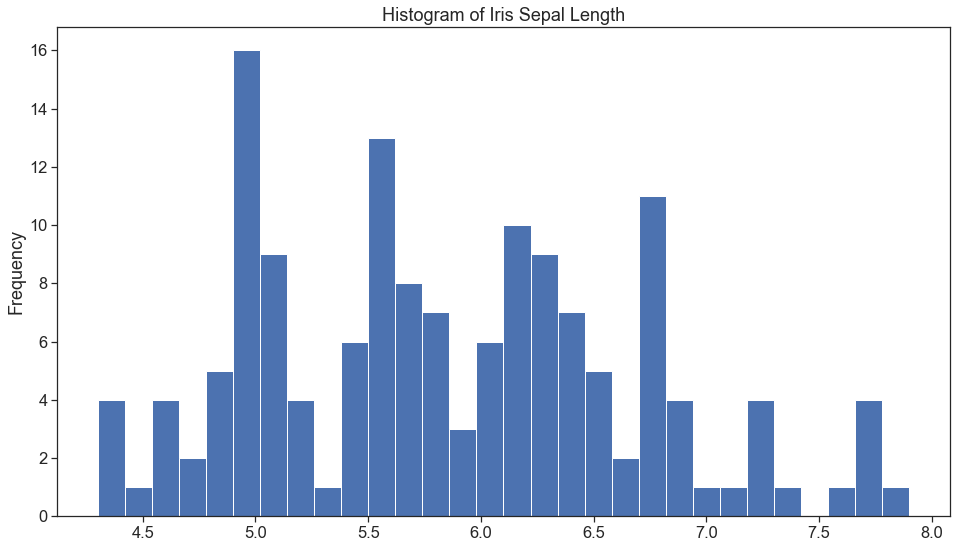

In [28]:
plt.hist(sepal_length, bins=30)
plt.title('Histogram of Iris Sepal Length')
plt.ylabel('Frequency')

Okay, so not very informative. It would be very helpful to distinquish the distribution of each species.

In [29]:
species

['setosa', 'versicolor', 'virginica']

To do this, we can use the `where` method on `np` to retrieve the indices of the values that correspond to each species. Recall that `observations[:, 4]` holds the species for each observation. Calling `species.index('setosa')` returns the index of the string `'setosa'` in the species list.

In [30]:
setosa = np.where(data[:,4] == species.index('setosa'))
versicolor = np.where(data[:,4] == species.index('versicolor'))
virginica = np.where(data[:,4] == species.index('virginica'))

We can use these index arrays to, well, index into the `sepal_length` array.

**Try this!** Evaluate these index arrays to see what they contain.


In [31]:
# your code here


In the cell below, we prepare a list containing arrays of sepal length values for each species.

In [32]:
by_species = [sepal_length[setosa], sepal_length[versicolor], sepal_length[virginica]]

Finally, we can pass this list of arrays into `plt.hist`, similarly to before. Here we also ask the function to plot the data so that the counts for each species are stacked.

**Try this!** What happens when you set stacked to `False`?

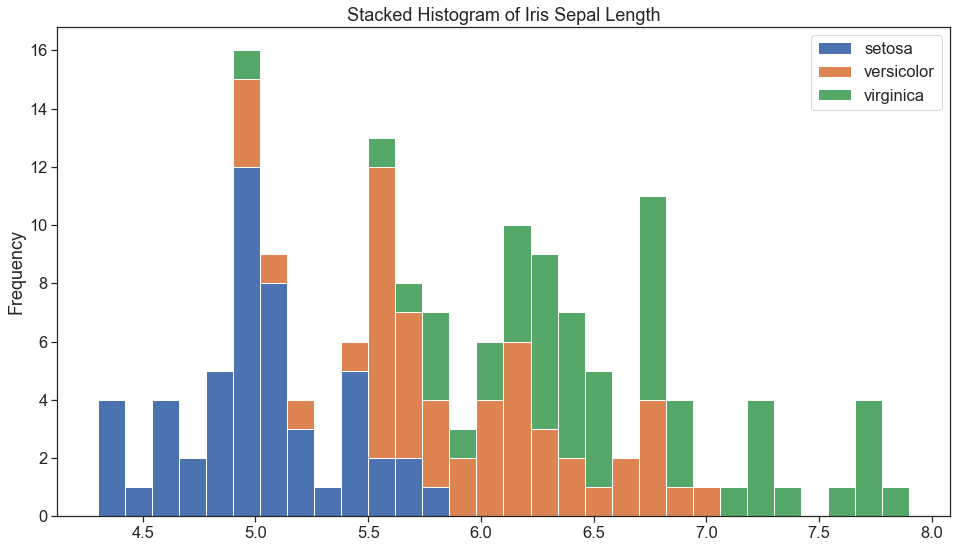

In [33]:
plt.hist(by_species, bins=30, stacked=True, label=species)
plt.title('Stacked Histogram of Iris Sepal Length')
plt.ylabel('Frequency')
plt.legend()

Much better! Here we can clearly see that *I. setosa* sepal lengths tend to be smaller than both *I. versicolor* and *I. virginica*. We can also see that the sepal lengths for *I. versicolor* and *I. virginica* overlap a lot. If we were to build a classification model by hand, we could be fairly confident about being able to tell setosas from the other two based only on sepal length. The story is not as great for the other two, but luckily, we have more features we can look at. Hope is not lost!

#### Scatter Plot

Box plots and histograms were great for looking at individual features, but in reality these features these features are not independent of each other. For example, it is plausible that a larger sepal length could be related to having a larger sepal width. This may not be true, but we might be able to find some patterns by analyzing interactions between the features. A scatter plot is perfect for this.

As an example, let's look at how sepal length and sepal width interact. In the cell below, we extract sepal length and sepal width values by species the same way we did for the histograms and then scatter the values from each species.

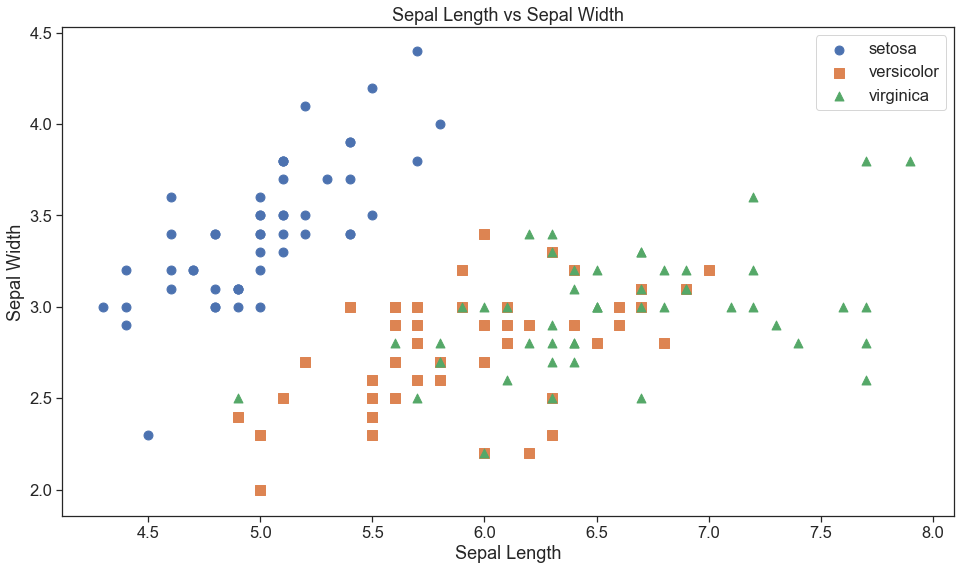

In [34]:
sepal_width = data[:, 1]

plt.scatter(sepal_length[setosa], sepal_width[setosa], 80, marker='o')
plt.scatter(sepal_length[versicolor], sepal_width[versicolor], 100, marker='s')
plt.scatter(sepal_length[virginica], sepal_width[virginica], 80, marker='^')

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(species)

It looks like there is some correlation between sepal length and sepal width.

#### Pair Plots

If a histogram is a shovel and a scatter plot is a truck (bear with me), then the pair plot is the bulldozer that comes out of combining them into one plot. It displays a scatter plot for every pair of features in a grid. Then along the diagonal, it can display a stacked histogram (though it really can show anything or nothing).

The implementation for a pair plot is pretty convoluted so we have hidden it away in `utility/util.py`. Feel free to take a peek if you are interested, however, we have already seen how to produce both historgrams and scatter plots before.

<Figure size 1152x864 with 0 Axes>

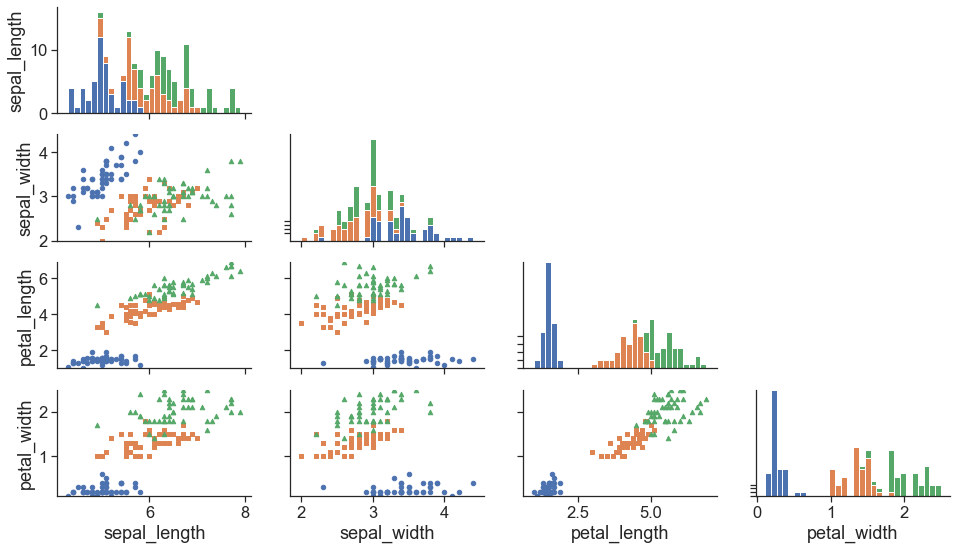

In [35]:
from utility.util import pair_plot

pair_plot(data[:, :4], data[:, 4], headings[:4])

### Drawing Conclusions using Machine Learning

Now that we have a feel for what are data looks like, let's try to build a model that can classify iris flowers. 

#### Making Training and Testing Sets

Generally, the first thing to do before starting any machine learning is to split your data into training and test sets. We allocate a test set in order to evaluate our model on data that it hasn't seen before.

However, even before that, we should separate out our measurements ($X$) from their correspoding labels ($y$).

In [36]:
X, y = data[:, :4], data[:, 4]

Next, we will leverage the `train_test_split` function from `sklearn` to perform our split. In the call below, we request that 30% of our data be put into the test set. 30% is a good rule of thumb for test set proportion. In general, data is always limited and ideally the more training data you have, the better your model will perform. When making a test set, we want to reserve enough to get a good sample of the data, but also not take too much that it hurts the training phase.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=217)
X.shape

(150, 4)

**Try this!** Evaluate each of these in the cell below and figure out how many data points you have in your _traning set_ and in your _test set_. Remember that you can call `array.shape` to see the dimensions of each array.

In [38]:
# your code here


#### Training the Model

Finally, we reach the goal, where we can now do some machine learning. For now, we won't worry about the specifics about the ML we will be doing, but rather, only demonstrating what we can do with machine learning. The model we will be using is hidden in the `secrets` module. If you are curious, you can take a look for yourself but this is not required at this time.

In [39]:
from utility.util import Model

The model that we will be working with has a similar interface (methods and properties) as many of the models we will be using throughout the rest of the course. The first thing we will want to do is make an instance of the model.

In [40]:
model = Model()

Next, we will fit the model with the training set that we created earlier.

In [41]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Testing the Model
Now for the exciting part: making some predictions!

In [42]:
predictions = model.predict(X_test)
predictions

array([0., 2., 1., 2., 1., 0., 0., 2., 2., 0., 1., 0., 2., 1., 2., 1., 1.,
       0., 2., 0., 0., 1., 0., 2., 1., 1., 0., 1., 1., 0., 1., 2., 2., 0.,
       0., 0., 2., 1., 0., 0., 2., 2., 0., 1., 1.])

#### Evaluating the Model
We can retrieve a score for how well the model performs on the training data as well as on the test data. Which score do you think is more informative? 

It is important to note that an imperfect training score is common as data often includes outliers. In fact, a perfect score may even be a sign of overfitting, something we would want to avoid.

In [43]:
score = model.score(X_train, y_train)
print(f'Accuracy: {score}')

Accuracy: 0.9714285714285714


In [44]:
score = model.score(X_test, y_test)
print(f'Accuracy: {score}')

Accuracy: 0.9555555555555556


The code below shows which of the predicted labels match the actual labels of the test examples. We see that the model got `43/45` examples right, which is pretty darn good. 

In [45]:
print(predictions)
print(y_test)

predictions == y_test

[0. 2. 1. 2. 1. 0. 0. 2. 2. 0. 1. 0. 2. 1. 2. 1. 1. 0. 2. 0. 0. 1. 0. 2.
 1. 1. 0. 1. 1. 0. 1. 2. 2. 0. 0. 0. 2. 1. 0. 0. 2. 2. 0. 1. 1.]
[0. 2. 2. 2. 1. 0. 0. 1. 2. 0. 1. 0. 2. 1. 2. 1. 1. 0. 2. 0. 0. 1. 0. 2.
 1. 1. 0. 1. 1. 0. 1. 2. 2. 0. 0. 0. 2. 1. 0. 0. 2. 2. 0. 1. 1.]


array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

### Communicating Your Findings

Now that you have a fairly successful model that can classify irises, you want to share this with the rest of the world. This is often the hardest part of the entire workflow because you have to discuss the significance of your findings and present them so they can be understood.

**Write-up** How would you communicate your findings for this example? What are the most significant results we found?

The original goal in this example was to see if we could use some measurements about a cohort of irises to classify them by species.

**Write-up** We were successful! As evaluation showed, our model performs pretty well in the testing phase. But this alone may not be enough. What else might we consider doing before we use this Iris classification approach for real?